In [2]:
from preprocessing import *
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree

matplotlib.rcParams['figure.figsize'] = [15,5]

data_contrats = pd.read_csv('train_contrats.csv',sep=";", engine="python")
data_contrats["Freq_sinistre"] = data_contrats["nombre_de_sinistre"]/data_contrats["Exposition_au_risque"]

In [3]:
def preprocessing(data, balance=True, train_size=0.5):
    import pandas as pd
    if balance : 
      data_non_nul=data[data.nombre_de_sinistre>0]
      data_nul=data[data.nombre_de_sinistre==0]
      data_nul_1,data_nul_2=train_test_split(data_nul,train_size=len(data_non_nul)/len(data_nul))
      data_clustering=pd.concat([data_non_nul,data_nul_1])
    else :
      data_clustering = data.copy()
    columns_conduc=["Classe_Age_Situ_Cont","Type_Apporteur","Activite"]
    columns_contrat=["Mode_gestion","Zone","Fractionnement","franchise","FORMULE",'Exposition_au_risque']
    columns_vehi=["Age_du_vehicule","ValeurPuissance","Freq_sinistre"]
    #columns_vehi=["Age_du_vehicule","ValeurPuissance"]
    data_clustering=data_clustering[columns_conduc+columns_contrat+columns_vehi]
    data_clustering.loc[:,"Classe_Age_Situ_Cont"]=data_clustering["Classe_Age_Situ_Cont"].apply(classe_age)
    data_clustering.loc[:,"franchise"]=data_clustering["franchise"].apply(franchise_)
    data_clustering.loc[:,["Type_Apporteur","Activite","Zone","FORMULE"]] = data_clustering[["Type_Apporteur","Activite","Zone","FORMULE"]].astype('str')
    data_clustering_d=pd.get_dummies(data_clustering)
    data_scaled = normalize(data_clustering_d, axis=0)

    data_scaled = pd.DataFrame(data_scaled, columns=data_clustering_d.columns)
    #data_scaled["Freq_sinistre"] = data["Freq_sinistre"]

    if train_size < 1 :
        train_data,test_data = train_test_split(data_scaled,train_size=train_size)
    else :
        train_data,test_data = data_scaled, None
    return train_data,test_data

In [4]:
df = preprocessing(data_contrats, balance=False, train_size=1)[0]
#df["Freq_sinistre"]=data_contrats["Freq_sinistre"]
#df["Freq_sinistre"] = data_contrats["Freq_sinistre"]
#df = df[:10000]
X = df.drop("Freq_sinistre", axis=1, inplace=False).to_numpy()
Y = np.array(df["Freq_sinistre"])

In [5]:
df

,Classe_Age_Situ_Cont,franchise,Exposition_au_risque,ValeurPuissance,Freq_sinistre,Type_Apporteur_1,Type_Apporteur_2,Type_Apporteur_3,Activite_1,Activite_2,...,Zone_6,Fractionnement_A,Fractionnement_S,Fractionnement_T,FORMULE_2,FORMULE_3,FORMULE_4,FORMULE_5,Age_du_vehicule_<= 5 ans,Age_du_vehicule_> 5 ans
0,0.005091,0.003409,0.003428,0.003628,0.0,0.004018,0.000000,0.0,0.0,0.0,...,0.0,0.005908,0.000000,0.000000,0.0,0.000000,0.0,0.009036,0.004136,0.000000
1,0.004243,0.002272,0.002555,0.003628,0.0,0.000000,0.007328,0.0,0.0,0.0,...,0.0,0.000000,0.006883,0.000000,0.0,0.003828,0.0,0.000000,0.000000,0.005897
2,0.004243,0.002272,0.001433,0.003628,0.0,0.000000,0.007328,0.0,0.0,0.0,...,0.0,0.000000,0.006883,0.000000,0.0,0.003828,0.0,0.000000,0.000000,0.005897
3,0.004243,0.002272,0.001620,0.002073,0.0,0.000000,0.007328,0.0,0.0,0.0,...,0.0,0.000000,0.006883,0.000000,0.0,0.000000,0.0,0.009036,0.004136,0.000000
4,0.005091,0.002272,0.001496,0.002073,0.0,0.000000,0.007328,0.0,0.0,0.0,...,0.0,0.000000,0.006883,0.000000,0.0,0.000000,0.0,0.009036,0.004136,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87223,0.005091,0.002272,0.001745,0.003628,0.0,0.004018,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.005166,0.0,0.003828,0.0,0.000000,0.004136,0.000000
87224,0.005091,0.002272,0.001745,0.003628,0.0,0.004018,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.005166,0.0,0.003828,0.0,0.000000,0.004136,0.000000
87225,0.005091,0.002272,0.000997,0.003628,0.0,0.004018,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.005166,0.0,0.003828,0.0,0.000000,0.000000,0.005897
87226,0.005091,0.002272,0.001745,0.003628,0.0,0.004018,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.005166,0.0,0.003828,0.0,0.000000,0.004136,0.000000


In [5]:
df_drop = df.drop("Freq_sinistre", axis=1)
tree = KDTree(df_drop.values)

In [6]:
def approx(df_drop, y, i, dist, ind, var):
    """
    Approximates the value of Freq_sinistre for row i 
    """
    delta_y = (y-y[i])[ind]
    gauss_weights = np.exp(-(dist) / var)
    y_hat = max(y[i]+ np.dot(delta_y, gauss_weights),0)
    return y_hat

Pour les 80000 points du jeu de données, il faut donc compter près de 400 secondes. Cela reste raisonnable. Toutefois, pour trouver la bonne valeur de la variance, il faudra faire cela plusieurs fois ce qui peut prendre du temps. On va commencer par selectionner les 1000 voisins les plus proches situés à une distance inférieure ou égale à 0.25.

In [7]:
def approx_freq(df, thresh, k, var):
    """
    approximates the Freq_sinisre column and inflate zeros
    
    parameters :
    thresh : part of the space points to select (maximum distance between a point and one of the selected neighbour)
    k : first neighbours to search in KDTree. This may affect computationnal time.
    var : vairance of the gaussian distance
    """
    Y_hat = []
    Y = df["Freq_sinistre"].values
    N=[]
    for i in range(len(df)):
        #if i % 10000 == 0:
        #    print(i)
        features = df_drop.iloc[i]
        # select k nearest neigbours
        dist, ind = tree.query(features.values.reshape(1, -1), k=k)
        # select only those not too far (to be discussed)
        n = np.sum(dist<thresh)
        dist = dist[0][:n]
        ind = ind[0][:n]
        N.append(n)
        y_hat = approx(df_drop, Y, i, dist, ind, var)
        Y_hat.append(y_hat)
    df_copy = df.copy()
    df_copy["Freq_sinistre"] = Y_hat
    return df_copy
    

#### Optimisation de la variance

Les bornes n'ont pas été trouvées directement. A partir de exp(-5), plusieurs valeurs ont été testées pour trouver un intervalle qui contiennent les plateaux "hauts et bas" pour les deux mesures : nombre de zéros et erreur quadratique. Nous savions que la premiere serait décroissante en fonction de la variance, et l'autre croissante. Nous avons ainsi esayer d'avoir des intervalles qui permettaient de couvrir la majorité de valeurs prises par les deux metriques. Nous avons enfin remarqué qu'au dela de 3, les deux valeurs variaient peu, ainsi qu'en deça de -7.

new dist

In [8]:
def approx(df_drop, y, i, dist, ind, var):
    """
    Approximates the value of Freq_sinistre for row i 
    """
    delta_y = (y-y[i])[ind]
    gauss_weights = np.exp(-(dist) / var)
    y_hat = max(y[i]+ np.dot(delta_y, gauss_weights),0)
    return y_hat

Attention : l'execution de la cellule suivante prend plusieurs heures

In [10]:
thresh = 0.25
k=1000
errList = []
countList = []
logVarList = np.linspace(-20,3,50)
#varList = [0.01,0.05,0.1,0.5,1,5]
for logVar in logVarList:
    print(f"ln(var) = {logVar}")
    var = np.exp(logVar)
    #print(var)
    df_approx = approx_freq(df, thresh, k, var)
    Y_hat = df_approx["Freq_sinistre"]
    err = np.sqrt(np.mean((df.Freq_sinistre-Y_hat)**2))
    countList.append(count_zeros(Y_hat,10**(-6)))
    print(f"Error : {err} | zeros : {count_zeros(Y_hat,10**(-6))}")
    errList.append(err)

ln(var) = -20.0
Error : 0.0032658390942439026 | zeros : 0.9440546613472738
ln(var) = -19.53061224489796
Error : 0.0032658390942439026 | zeros : 0.9440546613472738
ln(var) = -19.06122448979592
Error : 0.0032658390942439026 | zeros : 0.9440546613472738
ln(var) = -18.591836734693878
Error : 0.0032658390942439026 | zeros : 0.9440546613472738
ln(var) = -18.122448979591837
Error : 0.0032658390942439026 | zeros : 0.9440546613472738
ln(var) = -17.653061224489797
Error : 0.0032658390942439026 | zeros : 0.9440546613472738
ln(var) = -17.183673469387756
Error : 0.0032658390942439026 | zeros : 0.9440546613472738
ln(var) = -16.714285714285715
Error : 0.0032658390942439026 | zeros : 0.9440546613472738
ln(var) = -16.244897959183675
Error : 0.0032658390942439026 | zeros : 0.9440546613472738
ln(var) = -15.775510204081632
Error : 0.0032658390942439026 | zeros : 0.9440546613472738
ln(var) = -15.306122448979592
Error : 0.0032658390942439026 | zeros : 0.9440546613472738
ln(var) = -14.83673469387755
Error : 

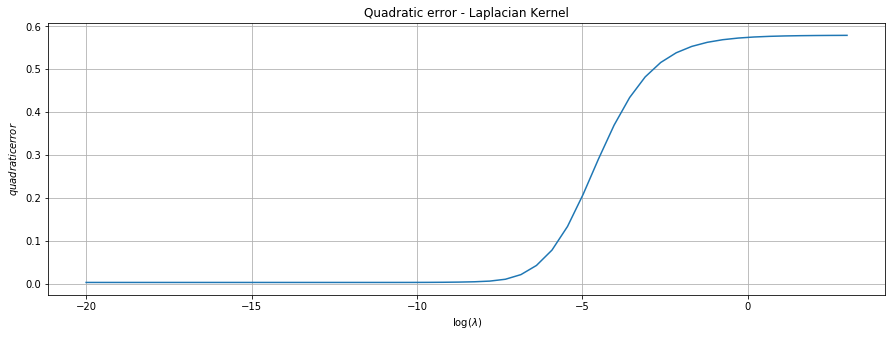

In [46]:
fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(logVarList)

plt.plot((logVarList), errList)
plt.title('Quadratic error - Laplacian Kernel')
plt.xlabel('$\log (\lambda$)')
plt.ylabel('$quadratic error$')
plt.grid()
plt.show()

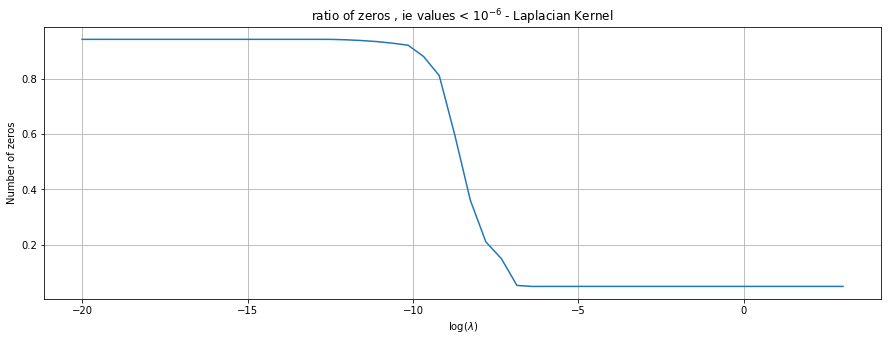

In [45]:
fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(logVarList)
plt.plot((logVarList), countList)
plt.title('ratio of zeros , ie values < $10^{-6}$ - Laplacian Kernel')
plt.xlabel('$\log (\lambda)$')
plt.ylabel('Number of zeros')
plt.grid()
plt.show()

In [17]:
np.save("count_l1.npy",np.array(countList))
np.save("err_l1.npy",np.array(errList))
np.save("logVar_l1.npy",np.array(logVarList))

from google.colab import files
import time
time.sleep(15)
files.download('count_l1.npy')
files.download('err_l1.npy')
files.download('logVar_l1.npy')

ModuleNotFoundError: No module named 'google.colab'

In [18]:
var = np.exp(-7)
df_approx = approx_freq(df, thresh, k, var)
Y_hat = df_approx["Freq_sinistre"]
err = np.sqrt(np.mean((df.Freq_sinistre-Y_hat)**2))
print(f"Error : {err} | zeros : {count_zeros(Y_hat,10**(-6))}")

Error : 0.017286275843866435 | zeros : 0.06324803962030541
